### 7.2 Exercise: Titanic Case Study Part 2
Complete the Titanic Case Study Part 2 tutorial. 
- This will be a complete analysis case study but Part 2 is the feature and dimensionality reduction part. 
- I have provided sample code for you to use as you go through the tutorial. 
- I recommend that you comment out the steps and run them separately so you can fully understand what you are doing for each step of the analysis. 
- As you go through each step, show visually that you have successfully completed each step in your notebook or paste images into a document.

In [36]:
# Libraries
import pandas as pd
import numpy as np
import yellowbrick
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates

#### 1. Load the data from the “train.csv” file into a DataFrame.


In [37]:
# Import the csv file (already in the same directory as the notebook, so I can leave out a step)
data = pd.read_csv('train.csv')

#### 2. Display the first 5 rows of data so you can see the column headings and the type of data for each column.


In [38]:
print('The dimension of the table is:', data.shape)

The dimension of the table is: (891, 12)


#### 3. Display the first 5 rows of data so you can see the column headings and the type of data for each column.

In [39]:
# Print the header
print(data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [40]:
# I prefer this view because it more closely resembels the spreadhseet
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 5. Look at summary information about your data (total, mean, min, max, freq, unique, etc.)  Does this present any more questions for you?  Does it lead you to a conclusion yet?  

In [41]:
print('Describe Data')
print(data.describe())
print('Summarized Data')
print(data.describe(include=['O']))

Describe Data
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Summarized Data
                     Name   Sex  Ticket Cabin Embar

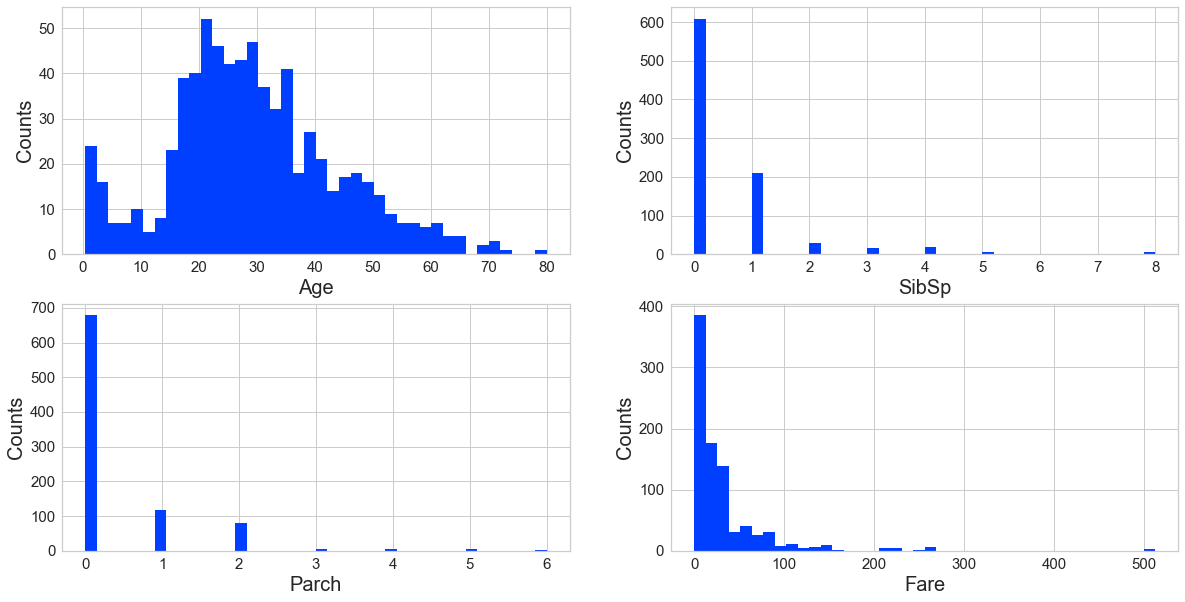

In [42]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest that I ant to see
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# Draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins = 40)
    ax.set_xlabel(xaxes[idx], fontsize = 20)
    ax.set_ylabel(yaxes[idx], fontsize = 20)
    ax.tick_params(axis = 'both', labelsize = 15)
plt.show()

#### 7. Make some bar charts for variables with only a few options.

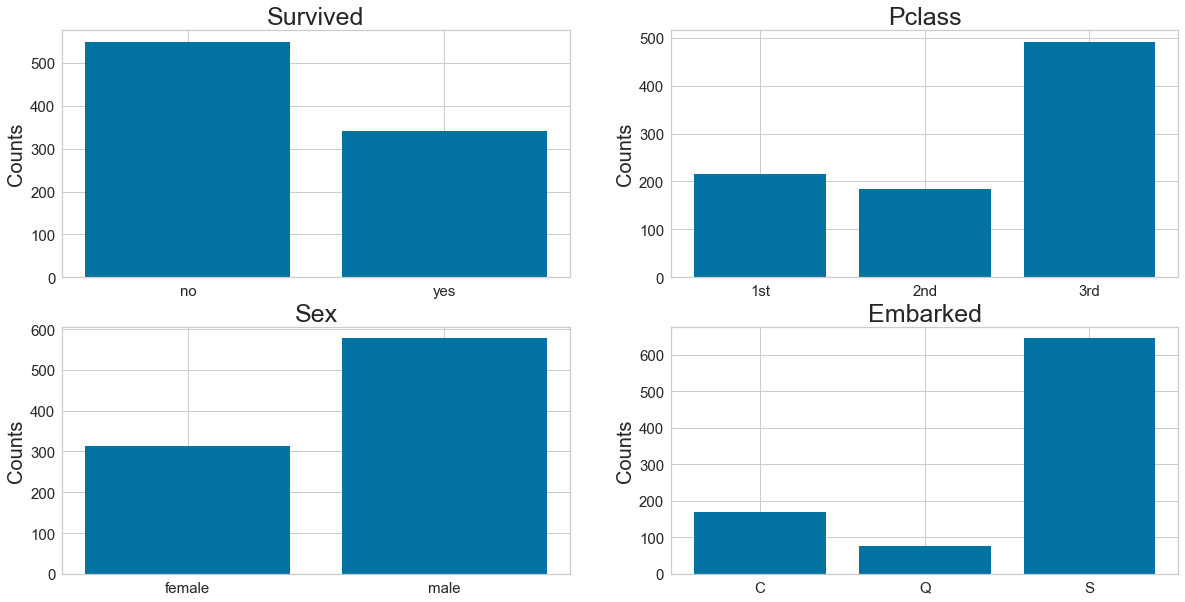

In [16]:
# Barcharts: 
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Survived
# Make the data read to feed into the visulizer
X_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name = 'Counts')['Survived']
Y_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name = 'Counts')['Counts']
# Make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize = 25)
axes[0, 0].set_ylabel('Counts', fontsize = 20)
axes[0, 0].tick_params(axis='both', labelsize = 15)

# Passenger Class
# Make the data read to feed into the visulizer
X_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name = 'Counts')['Pclass']
Y_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name = 'Counts')['Counts']
# Create the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize = 25)
axes[0, 1].set_ylabel('Counts', fontsize = 20)
axes[0, 1].tick_params(axis='both', labelsize = 15)

# Sex
# Make the data read to feed into the visulizer
X_Sex = data.groupby('Sex').size().reset_index(name = 'Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name = 'Counts')['Counts']
# Create the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize = 25)
axes[1, 0].set_ylabel('Counts', fontsize = 20)
axes[1, 0].tick_params(axis='both', labelsize = 15)

# Embarked
# Make the data read to feed into the visulizer
X_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# Create the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize = 25)
axes[1, 1].set_ylabel('Counts', fontsize = 20)
axes[1, 1].tick_params(axis='both', labelsize = 15)


#### 8. See if the data is correlated, make some Pearson Ranking charts

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [    nan,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

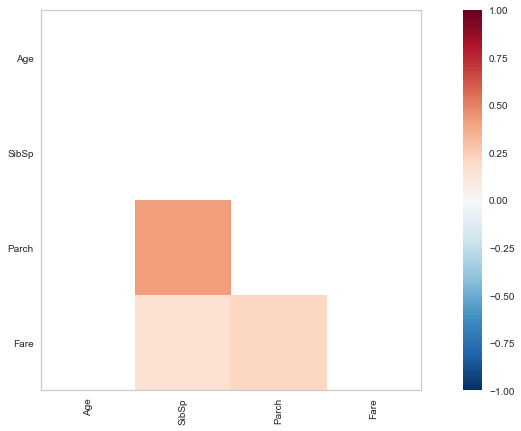

In [23]:
#Set up the Pearson Ranking

# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

# extract the numpy arrays from the data frame
X = data[num_features].to_numpy()

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features = num_features, algorithm = 'pearson')

# Fit the data to the visualizer
visualizer.fit(X)                

# Transform the data
visualizer.transform(X)             


#### 9. Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that survived and those that did not survive.

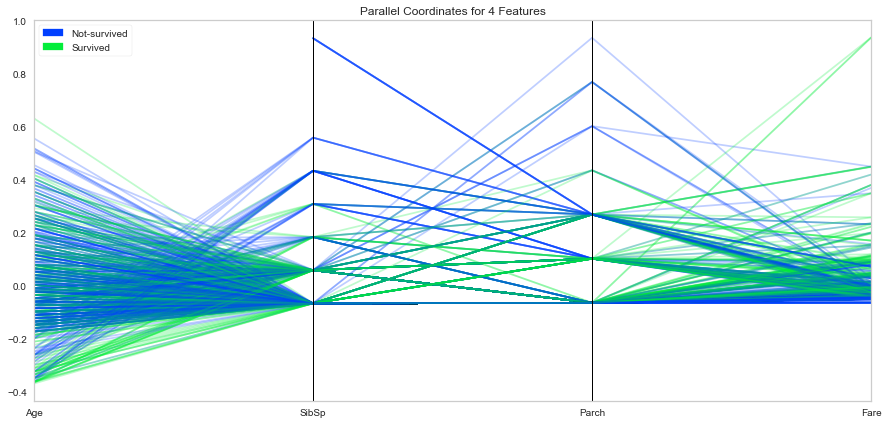

<AxesSubplot:title={'center':'Parallel Coordinates for 4 Features'}>

In [45]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# Choose the color palette
set_palette('sns_bright')

# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Copy data to a new dataframe
data_norm = data.copy()

# Normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna = True)) / (data[feature].max(skipna = True) - data[feature].min(skipna = True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
y = data.Survived.to_numpy()

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

# Fit the data to the visualizer
#visualizer.fit_transform(X, y)  


# Fit the visualizer and display it
visualizer.fit_transform(X, y)
visualizer.show()

# Show the data
#plt.show();

#### 10. Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.

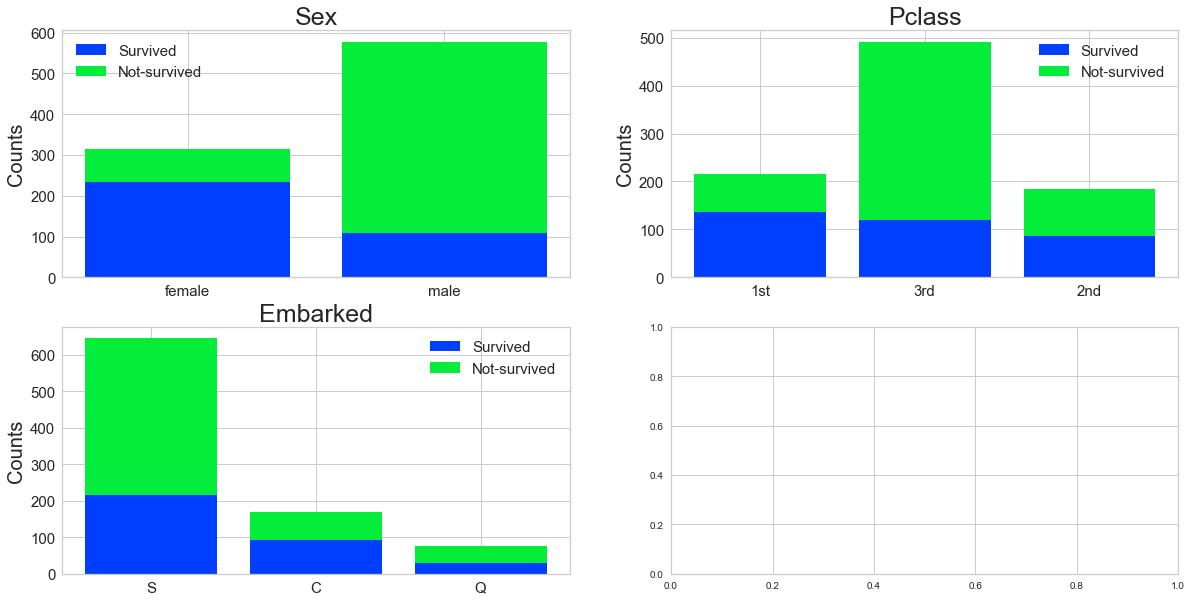

In [28]:
# Create stacked bar charts to compare who survived/not survived

# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Make the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Sex
# Make the data read to feed into the visulizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived'] == 1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived'] == 0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# Create the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom = Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize = 25)
axes[0, 0].set_ylabel('Counts', fontsize = 20)
axes[0, 0].tick_params(axis='both', labelsize = 15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# Passenger Class
# Make the data read to feed into the visulizer
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived'] == 1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived'] == 0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# Create the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize = 25)
axes[0, 1].set_ylabel('Counts', fontsize = 20)
axes[0, 1].tick_params(axis='both', labelsize = 15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# Embarked
# Make the data read to feed into the visulizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived'] == 1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived'] == 0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# Create the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize = 25)
axes[1, 0].set_ylabel('Counts', fontsize = 20)
axes[1, 0].tick_params(axis='both', labelsize = 15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
#plt.show()


#### 11. Fill in missing values and eliminate features

In [29]:
#F ill the missing age data with median value
def fill_na_median(data, inplace = True):
    return data.fillna(data.median(), inplace = inplace)

fill_na_median(data['Age'])

# Check the result
print(data['Age'].describe())

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [32]:
# Fill with the most represented value
def fill_na_most(data, inplace = True):
    return data.fillna('S', inplace = inplace)

fill_na_most(data['Embarked'])

# Check the result
print(data['Embarked'].describe())

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [31]:
# Log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['Fare_log1p'] = log_transformation(data['Fare'])

# Check the data
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Fare_log1p  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    2.962246  
std      0.806057   49.693429    0.969048  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    2.187218  
50%      0.000000   14.454200    2.737881  
75%      0.000000   31.000000    3.465736  
max      6.000000

#### 12. Adjust skewed Fare data 

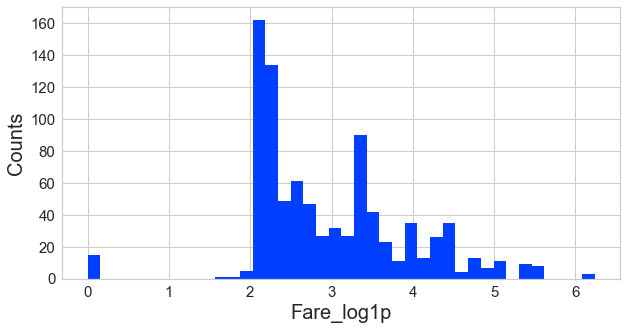

In [34]:
# Create the distribution using histogram
# set up the figure size
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['Fare_log1p'], bins = 40)
plt.xlabel('Fare_log1p', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)

#Show the plot
plt.show()

#### 13. Convert the categorical data into numbers (Sex, PClass, Embark)

In [35]:
# Get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = data[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

# check the data
print(data_cat_dummies.head(8))

   Pclass_1st  Pclass_2nd  Pclass_3rd  Sex_female  Sex_male  Embarked_C  \
0           0           0           1           0         1           0   
1           1           0           0           1         0           1   
2           0           0           1           1         0           0   
3           1           0           0           1         0           0   
4           0           0           1           0         1           0   
5           0           0           1           0         1           0   
6           1           0           0           0         1           0   
7           0           0           1           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
5           1           0  
6           0           1  
7           0           1  
